In [1]:
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

download from https://www.kaggle.com/pronto/cycle-share-dataset/data
performing Exploratory Data Analysis

In [2]:
data = pd.read_csv('trip.csv')
print len(data)
print data.head()

286858
   trip_id         starttime          stoptime    bikeid  tripduration  \
0      431  10/13/2014 10:31  10/13/2014 10:48  SEA00298       985.935   
1      432  10/13/2014 10:32  10/13/2014 10:48  SEA00195       926.375   
2      433  10/13/2014 10:33  10/13/2014 10:48  SEA00486       883.831   
3      434  10/13/2014 10:34  10/13/2014 10:48  SEA00333       865.937   
4      435  10/13/2014 10:34  10/13/2014 10:49  SEA00202       923.923   

     from_station_name                                    to_station_name  \
0  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
1  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
2  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
3  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
4  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   

  from_station_id to_station_id usertype  gender  birthyear  
0          CBD-06      

# Continuous/Quantitative Variables


In [3]:
# defermining the time range of the dataset
data = data.sort_values(by='starttime')
data.reset_index()
print('Data range of dataset: %s - %s'% (data.ix[0,'starttime'], data.ix[len(data)-1, 'stoptime']))

Data range of dataset: 10/13/2014 10:31 - 9/1/2016 0:20


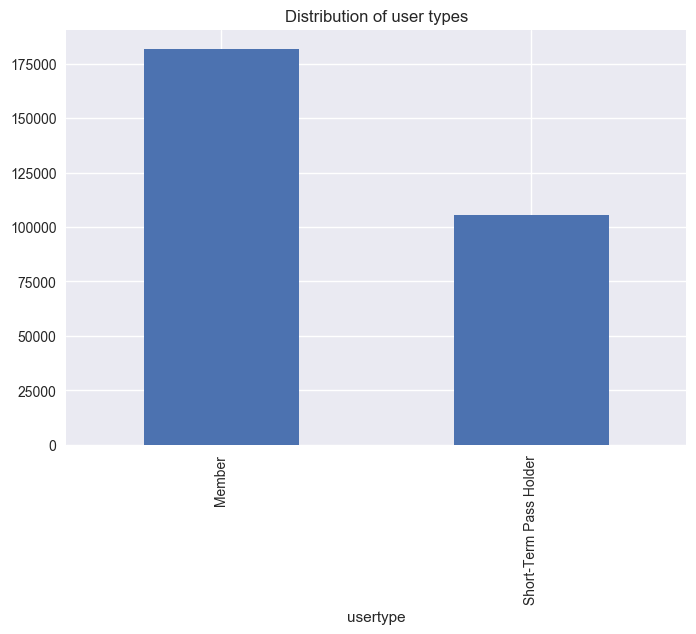

In [4]:
# plotting the distribution of user types
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title='Distribution of user types')

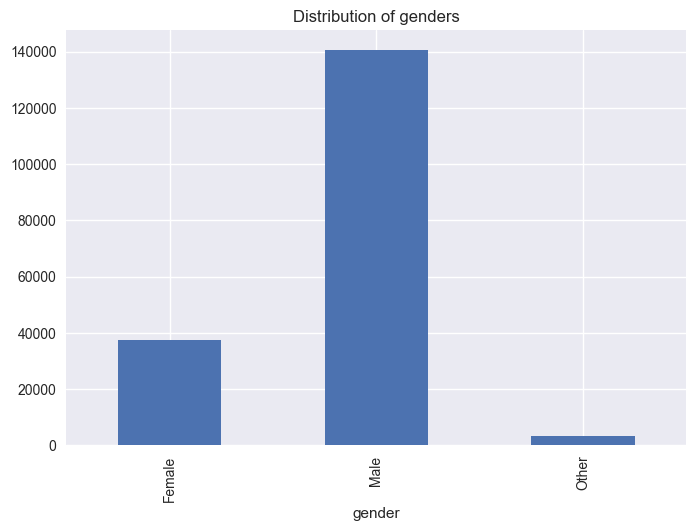

In [5]:
# plotting the distribution of gender
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title='Distribution of genders')

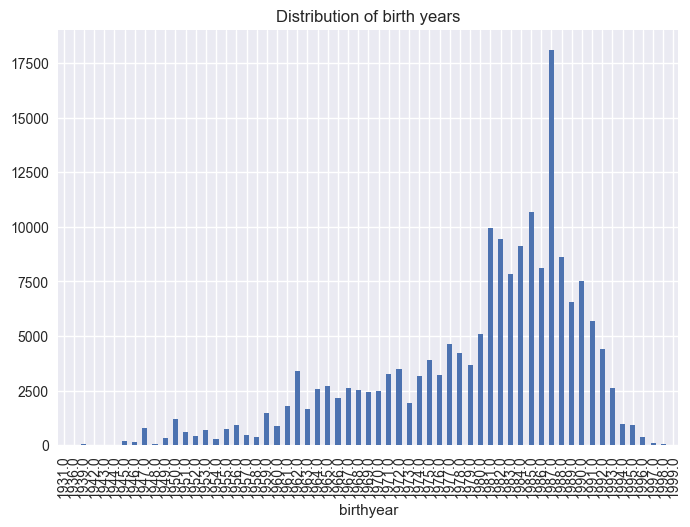

In [6]:
# plotting the distribution of birth years
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of birth years')

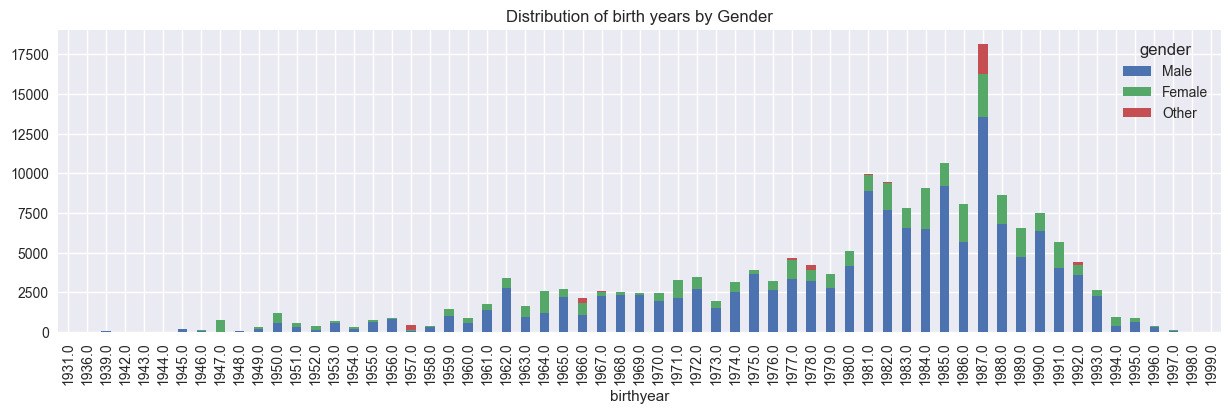

In [18]:
# plotting the distribution of birth years by gender type
groupby_birthyear_gender = data.groupby(['birthyear','gender'])
groupby_birthyear_gender = groupby_birthyear_gender['birthyear'].count().unstack('gender').fillna(0);
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title=
'Distribution of birth years by Gender', stacked=True, figsize=(15,4))

we at first transformed the data frame by unstacking, that is, splitting, the gender column into
three columns.